In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pandas-profiling --user

  Using cached https://files.pythonhosted.org/packages/82/86/203efa19d7d2a2b9abca62c454dcfa9649c4d5899374d4fb1c10ccfabb54/pandas_profiling-2.6.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4a/1c/6359be64e8301b84160f6f6f7936bbfaaa5e9a4eab6cbc681db07600b949/tqdm-4.45.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/30/9e/f663a2aa66a09d838042ae1a2c5659828bb9b41ea3a6efa20a20fd92b121/Jinja2-2.11.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2c/a7/b3aed4c28894a275e0f3d3826cf3999c1bd8cbc446bbd6eb16c7675baa0d/phik-0.9.11-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/86/3c/d118973b8d85eeba14b3a306a5a06f920dd92878fa57c264dbe70b83a197/statsmodels-0.11.1-cp37-none-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/13/fe/7614dec3db3f20882ff12dae0a58b579e97b590f2994ce9c953fe179d512/visions-0.4.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/package

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
pip install hyperopt --user

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import pandas_profiling as pp

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

D:\Anaconda\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
valid_part = 0.3
pd.set_option('max_columns',100)

In [72]:
train0 = pd.read_csv('C:/Users/Hp/Downloads/Vehicles_cleaned_int.csv')
train0.head(5)

,id,region,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,state,price
0,7088746062,130,102,0,32349,5,2,90186.0,0,0,0,8,27,10299
1,7088745301,130,101,4,3710,5,2,115120.0,0,0,2,3,27,8995
2,7088744126,130,101,19,34777,5,2,85000.0,0,0,0,1,27,9500
3,7088743681,130,94,16,16308,5,2,212526.0,0,0,1,0,27,3995
4,7088741557,130,105,21,30832,5,2,85127.0,0,0,0,13,27,12995


In [73]:
train0 = train0.drop('id', axis=1)

In [1]:

train0.head(5)

NameError: name 'train0' is not defined

In [75]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train0.columns.values.tolist()
for col in features:
    if train0[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in train0.columns:
        le = LabelEncoder()
        le.fit(list(train0[col].astype(str).values))
        train0[col] = le.transform(list(train0[col].astype(str).values))

In [76]:

train0['odometer'] = train0['odometer'].astype(int)

In [77]:
train0.head(10)

,region,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,state,price
0,130,102,0,32349,5,2,90186,0,0,0,8,27,10299
1,130,101,4,3710,5,2,115120,0,0,2,3,27,8995
2,130,101,19,34777,5,2,85000,0,0,0,1,27,9500
3,130,94,16,16308,5,2,212526,0,0,1,0,27,3995
4,130,105,21,30832,5,2,85127,0,0,0,13,27,12995
5,130,104,7,32869,5,2,112383,0,0,1,0,27,10995
6,130,101,4,4630,5,2,124446,0,0,0,10,27,8995
7,130,97,38,30399,5,2,185123,0,0,1,3,27,3995
8,130,95,38,31483,5,2,181020,0,0,0,8,27,8995
9,130,98,30,20331,5,2,162214,0,0,1,9,27,7995


In [78]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522603 entries, 0 to 522602
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   region        522603 non-null  int64
 1   year          522603 non-null  int64
 2   manufacturer  522603 non-null  int64
 3   model         522603 non-null  int64
 4   cylinders     522603 non-null  int64
 5   fuel          522603 non-null  int64
 6   odometer      522603 non-null  int32
 7   title_status  522603 non-null  int64
 8   transmission  522603 non-null  int64
 9   drive         522603 non-null  int64
 10  type          522603 non-null  int64
 11  state         522603 non-null  int64
 12  price         522603 non-null  int64
dtypes: int32(1), int64(12)
memory usage: 49.8 MB


In [79]:
train0 = train0.sample(144902)

In [80]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144902 entries, 98569 to 50249
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   region        144902 non-null  int64
 1   year          144902 non-null  int64
 2   manufacturer  144902 non-null  int64
 3   model         144902 non-null  int64
 4   cylinders     144902 non-null  int64
 5   fuel          144902 non-null  int64
 6   odometer      144902 non-null  int32
 7   title_status  144902 non-null  int64
 8   transmission  144902 non-null  int64
 9   drive         144902 non-null  int64
 10  type          144902 non-null  int64
 11  state         144902 non-null  int64
 12  price         144902 non-null  int64
dtypes: int32(1), int64(12)
memory usage: 14.9 MB


In [81]:
target_name = 'price'
train_target0 = train0[target_name]
train0 = train0.drop([target_name], axis=1)

In [82]:
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [83]:
train0b = train0
train_target0b = train_target0
# Synthesis valid as test for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=valid_part, random_state=0)

In [84]:
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [85]:
train0.head(3)

,region,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,state
0,-1.477736,0.148541,-1.020768,1.027200,0.212583,3.171980,0.308472,-0.20132,-0.33238,-0.727178,0.815785,-0.397737
1,-0.958089,0.381082,-1.204620,0.307110,0.212583,0.110041,-0.032366,-0.20132,-0.33238,-0.727178,1.033607,-0.132201
2,1.231245,0.962432,-0.469210,-0.248293,0.212583,-2.951899,-0.407881,-0.20132,-0.33238,-0.727178,0.815785,-0.729656


In [86]:
len(train0)

115921

In [87]:
train, test, target, target_test = train_test_split(train0, train_target0, test_size=valid_part, random_state=0)

In [88]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [89]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [90]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [91]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model акщь Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [92]:
linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0,linreg,train,test)

target =  [23800 16500  9200  5899 12500]
ytrain =  [14872.86547994 13481.79657572  7066.09240245  9367.80881952
 10588.79341269]
acc(r2_score) for train = 25.1
acc(relative error) for train = 45.83
acc(rmse) for train = 727776.95
target_test = [ 8800  8995  8995 14750  7500]
ytest = [14067.29849509 10879.62826578 10304.20089836 11662.00675807
 -2930.92206564]
acc(r2_score) for test = -28.29
acc(relative error) for test = 46.51
acc(rmse) for test = 957360.39


In [93]:
svr = SVR()
svr.fit(train, target)
acc_model(1,svr,train,test)

target =  [23800 16500  9200  5899 12500]
ytrain =  [10049.14770951  9524.81162496  8782.98449883  9370.73169078
  9947.09901864]
acc(r2_score) for train = 1.96
acc(relative error) for train = 50.15
acc(rmse) for train = 832659.44
target_test = [ 8800  8995  8995 14750  7500]
ytest = [ 9586.44351519 10150.53705101  9233.6567148   9636.17815368
  9268.68422993]
acc(r2_score) for test = 2.22
acc(relative error) for test = 50.47
acc(rmse) for test = 835831.23


In [94]:
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(6,random_forest,train,test)

target =  [23800 16500  9200  5899 12500]
ytrain =  [23780.  17609.9  7878.   5814.1 13490. ]
acc(r2_score) for train = 94.16
acc(relative error) for train = 10.22
acc(rmse) for train = 203228.23
target_test = [ 8800  8995  8995 14750  7500]
ytest = [14761.6 13064.6  8376.1 14600.   6387.2]
acc(r2_score) for test = 68.48
acc(relative error) for test = 25.52
acc(rmse) for test = 474583.25


In [95]:
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

In [96]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': False,
        'seed':0,        
    }
modelL = lgb.train(params, train_set = train_set, num_boost_round=10000,
                   early_stopping_rounds=8000,verbose_eval=500, valid_sets=valid_set)

Training until validation scores don't improve for 8000 rounds
[500]	valid_0's rmse: 5131.71
[1000]	valid_0's rmse: 4927.51
[1500]	valid_0's rmse: 4837.17
[2000]	valid_0's rmse: 4769.57
[2500]	valid_0's rmse: 4718.01
[3000]	valid_0's rmse: 4675.56
[3500]	valid_0's rmse: 4643.32
[4000]	valid_0's rmse: 4616.26
[4500]	valid_0's rmse: 4591.16
[5000]	valid_0's rmse: 4568.75
[5500]	valid_0's rmse: 4550.14
[6000]	valid_0's rmse: 4533.74
[6500]	valid_0's rmse: 4517.11
[7000]	valid_0's rmse: 4501.76
[7500]	valid_0's rmse: 4487.31
[8000]	valid_0's rmse: 4474.78
[8500]	valid_0's rmse: 4462.82
[9000]	valid_0's rmse: 4451.89
[9500]	valid_0's rmse: 4441.9
[10000]	valid_0's rmse: 4432.11
Did not meet early stopping. Best iteration is:
[9997]	valid_0's rmse: 4432.09


In [63]:
acc_boosting_model(8,modelL,trainb,testb,modelL.best_iteration)

target =  [ 3500  8995 10999  8995  7999]
ytrain =  [ 3409.88422987 24689.55794539  7449.88594746  6417.56701193
  8331.71047988]
acc(r2_score) for train = 82.22
acc(relative error) for train = 19.7
acc(rmse) for train = 354788.0
target_test = [ 5400  8995   999 19200  5999]
ytest = [ 8166.19913736  9558.66520648 10544.91360341 10070.33159828
  8589.20977453]
acc(r2_score) for test = 72.96
acc(relative error) for test = 23.83
acc(rmse) for test = 442049.97


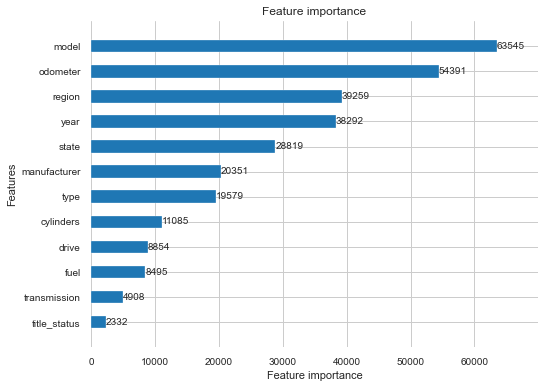

In [105]:
fig = plt.figure(figsize = (8,6))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();
plt.close()